# Lab 2-2. Decision Tree

 ### 간단하교 효과적인 머신러닝 툴인 Scikit-learn 패키지를 사용한 Decision Tree Tutorial
*   Classification Tree, Regression Tree
*   Random Forest, Gradient Boost

[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html






---
## Classification Tree


### Load Diabetes Dataset from Google Drive

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
diabetes = pd.read_csv('/content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data/diabetes.csv')
print(diabetes.columns)
diabetes.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]

In [120]:
diabetes_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [121]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


### Split and prepare the dataset

In [122]:
train = diabetes[:650]
test = diabetes[650:]

In [123]:
x_train = np.asarray(train.drop('Outcome',1))
y_train = np.asarray(train['Outcome'])
x_test = np.asarray(test.drop('Outcome',1))
y_test = np.asarray(test['Outcome'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((650, 8), (650,), (118, 8), (118,))

### Decision Tree

In [125]:
from sklearn import tree 

In [126]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0) # Gini by default
clf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


트레이닝 셋에서의 정확도는 100%이나, 테스트셋에서의 정확도는 떨어짐. 즉, overfitting 되어 새로운 데이터에 generalize가 안된다는 뜻.

#### Visualize Tree

[Ellipsis]

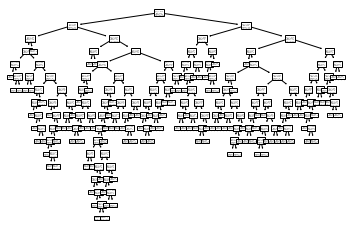

In [127]:
tree.plot_tree(clf)
[...]

 Pre-pruning, max_depth=3 으로 설정해서 오버피팅을 방지한다. 트레이닝 셋에서의 정확도는 떨어지지만, 테스트 셋에서의 성능은 올라간다. 
 그 외에도 [post pruning with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)를 활용할 수 있다.

In [128]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 0.783
Accuracy on test set: 0.763


[Ellipsis]

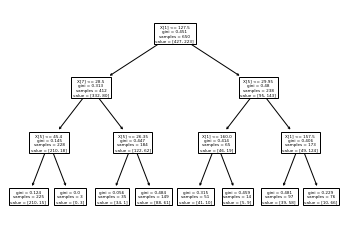

In [129]:
tree.plot_tree(clf)
[...]


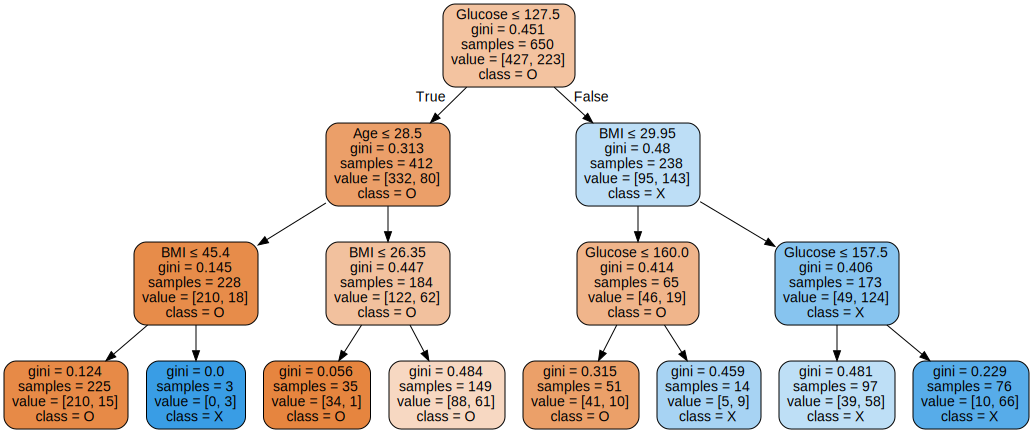

In [130]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=diabetes_features,  
                     class_names=['O','X'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Feature importance in Decision trees
강의에서 다룬 Variable Importance Measure와 같음.
각각의 예측변수가 decision에 있어서 얼마나 중요한지 0과 1사이의 값으로 모두 합쳐서 1이 되도록 나타냄

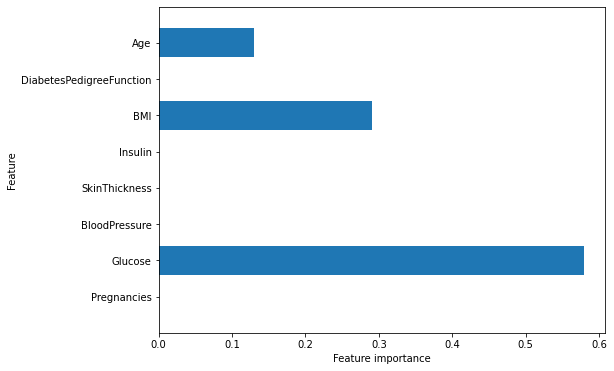

In [131]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(clf)

### Random Forest

diabetes dataset에 100개의 트리로 구성된 Random Forest를 적용해보자.

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.754


75.4%의 성능으로, Single tree 모델보다 성능이 떨어짐. 또한, Overfitting됨
따라서 max_features를 줄이고, max_depth를 준다.

In [133]:
rf1 = RandomForestClassifier(max_features=2, max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))

Accuracy on training set: 0.792
Accuracy on test set: 0.771


#### Feature importance in Random Forest

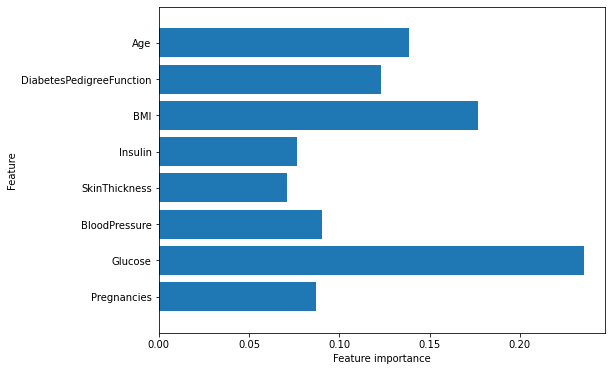

In [134]:
plot_feature_importances_diabetes(rf)

Single tree와 마찬가지로 글루코스와 BMI의 중요도가 높음. 반면, Random forest의 randomness 때문에 더 다양한 변수들을 고려하는걸 볼 수 있다.

### Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))

Accuracy on training set: 0.914
Accuracy on test set: 0.771


overfitting을 줄이기 위해서, maximum depth로 pre-pruning을 해준다.

In [136]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2) # by deafult 3
gb1.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(x_test, y_test)))

Accuracy on training set: 0.855
Accuracy on test set: 0.754


In [137]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01) # by default 0.1
gb2.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(x_test, y_test)))

Accuracy on training set: 0.797
Accuracy on test set: 0.754


두 방법 모두 모델의 complexity를 줄이면서 training set의 성능이 test set과 가까워졌다. 그러나 test set에서의 성능이 딱히 개선되지 않았다.

#### Feature importance in Gradient Boosting

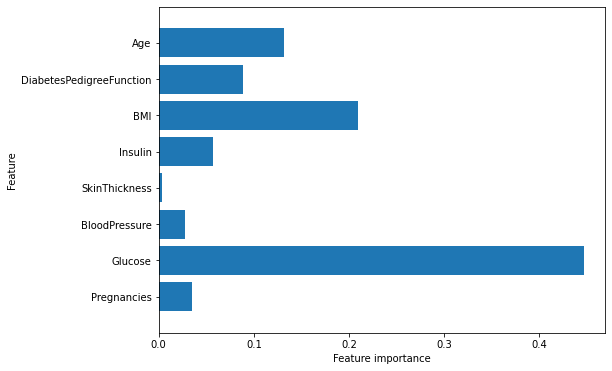

In [138]:
plot_feature_importances_diabetes(gb1)

Random forest의 feature importance와 비슷함.



---
## Regression Tree



### Simple regression tree using synthetic data

In [139]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [140]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [141]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [142]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

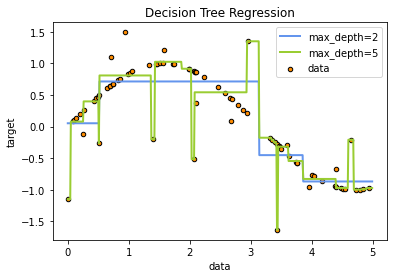

In [143]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Regression Tree with Tada ETA data



*   ATA: Actual Time of Arrival
*   ETA: Expected Time of Arrival
*   api_eta: 앱 API에서 예측된 ETA



In [144]:
tada_eta = pd.read_excel('/content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/2주차/Chapter 2_실습파일/tada_eta.xlsx')
print(tada_eta.columns)
tada_eta.head()

Index(['ATA', 'id', 'api_eta', 'created_at_kst', 'month', 'pickup_lng',
       'pickup_lat', 'pickup_gu', 'driver_id', 'driver_lng', 'driver_lat',
       'hour'],
      dtype='object')


,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [145]:
tada_eta['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*100000
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat','pickup_gu'],1)
tada_eta.head()

# sklearn의 tree는 범주 데이터는 다루지 못함. 이 경우에 one-hot encoding은 비효율적. 구 데이터도 활용하고 싶다면 h2o 참고

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ATA,api_eta,month,hour,distance
0,10.60,5.65,12,0,52.400202
1,9.20,8.60,12,0,44.465889
2,10.85,10.53,12,0,149.731535
3,5.52,1.92,7,0,1.000535
4,8.60,7.10,7,0,35.014797


In [146]:
tada_eta = tada_eta.sample(frac=1).reset_index(drop=True)
tada_eta.head()

,ATA,api_eta,month,hour,distance
0,7.92,3.12,12,23,8.661687
1,8.52,4.60,12,9,5.761973
2,8.57,7.23,12,1,94.851528
3,10.93,9.30,12,11,16.510222
4,8.12,6.95,12,17,42.741147


In [147]:
tada_eta.shape

(13916, 5)

In [148]:
train = tada_eta[:12000]
test = tada_eta[12000:]

In [149]:
x_train = np.asarray(train.drop('ATA',1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA',1))
y_test = np.asarray(test['ATA'])
eta_features = [x for i,x in enumerate(tada_eta.columns) if i!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [150]:
eta_features

['api_eta', 'month', 'hour', 'distance']

#### Gradient Boosting 사용

In [151]:
params = {'n_estimators': 100,
          'max_depth': 3,
          'min_samples_leaf': 5,
          'learning_rate': 0.05,
          'loss': 'ls'} # 'squared_error'와 같음

In [152]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

In [153]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 7.8557
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.0820
The initial error of API ETA on test set: 2.6285


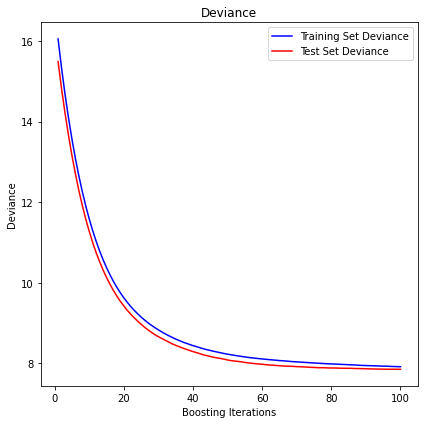

In [154]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

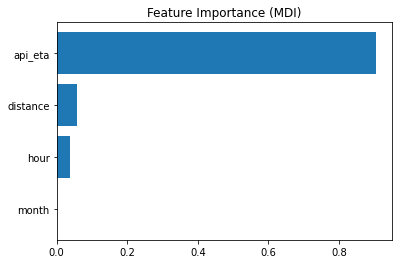

In [155]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

### HW 2: Make a better model for TADA ETA data
tree parameter를 바꾸거나, 아예 다른 알고리즘을 사용해도 됨.
트레이닝 데이터도 조작해도 되지만, 테스트셋은 조작 금지 

```
test = tada_eta[12000:]
```



[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html


In [156]:
# mse = mean_squared_error(y_test, reg.predict(x_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

# mae = mean_absolute_error(y_test, reg.predict(x_test))
# print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
tada_eta.head()

,ATA,api_eta,month,hour,distance
0,7.92,3.12,12,23,8.661687
1,8.52,4.60,12,9,5.761973
2,8.57,7.23,12,1,94.851528
3,10.93,9.30,12,11,16.510222
4,8.12,6.95,12,17,42.741147


In [159]:
train = tada_eta[:12000]
test = tada_eta[12000:]

In [160]:
x_train = np.asarray(train.drop('ATA',1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA',1))
y_test = np.asarray(test['ATA'])
x_train.shape, y_train.shape, x_test.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


((12000, 4), (12000,), (1916, 4), (1916,))

### RandomForest

#### 최적 max depth 찾기

In [161]:
rf = RandomForestRegressor(max_depth=4, random_state=0)

In [162]:
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
api_eta = x_test[:,0]
mse = mean_squared_error(y_test, pred)
mse_api = mean_squared_error(y_test, api_eta)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

The mean squared error (MSE) on test set: 8.2525
The initial error of API ETA on test set: 13.0248


In [163]:
mse_list = []
mse_api_list = []
mae_list = []
mae_api_list = []
for depth in range(1, 10):
  rf = RandomForestRegressor(max_depth=depth, random_state=0)
  rf.fit(x_train, y_train)
  pred = rf.predict(x_test)
  api_eta = x_test[:,0]
  mse = mean_squared_error(y_test, pred)
  mse_api = mean_squared_error(y_test, api_eta)
  mse_list.append(mse)
  mse_api_list.append(mse_api)
  print(f'RandomForest depth : {depth}')
  print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
  mae = mean_absolute_error(y_test, pred)
  mae_api = mean_absolute_error(y_test, api_eta)
  mae_list.append(mae)
  mae_api_list.append(mae_api)
  print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )

RandomForest depth : 1
The mean squared error (MSE) on test set: 10.5281
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.4471
The initial error of API ETA on test set: 2.6285
RandomForest depth : 2
The mean squared error (MSE) on test set: 8.8719
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.2035
The initial error of API ETA on test set: 2.6285
RandomForest depth : 3
The mean squared error (MSE) on test set: 8.4120
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.1447
The initial error of API ETA on test set: 2.6285
RandomForest depth : 4
The mean squared error (MSE) on test set: 8.2525
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.1290
The initial error of API ETA on test set: 2.6285
RandomForest depth : 5
The mean squared error (MSE) on test set: 8.0846
The initial error of API ETA on test set: 1

In [164]:
dict = {'depth':list(range(1,10)), 'mse':mse_list, 'mse_api':mse_api_list, 'mae':mae_list, 'mae_api':mae_api_list}
df = pd.DataFrame(dict)

In [165]:
df.head()

,depth,mse,mse_api,mae,mae_api
0,1,10.528083,13.024754,2.447077,2.628539
1,2,8.871864,13.024754,2.203525,2.628539
2,3,8.411958,13.024754,2.144679,2.628539
3,4,8.252487,13.024754,2.128954,2.628539
4,5,8.084580,13.024754,2.107079,2.628539


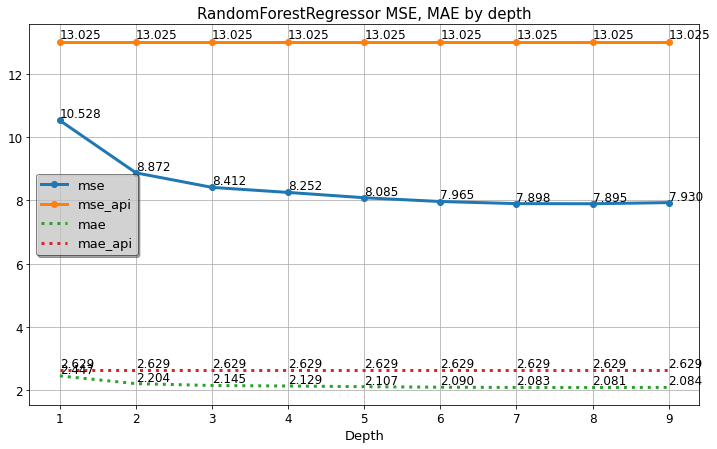

In [166]:
plt.figure(figsize=(12,7))
plt.grid(True)
plt.plot(df['depth'], df['mse'], 'o-', label='mse', linewidth=3)
plt.plot(df['depth'], df['mse_api'], 'o-', label='mse_api', linewidth=3)
plt.plot(df['depth'], df['mae'], ':', label='mae', linewidth=3)
plt.plot(df['depth'], df['mae_api'], ':', label='mae_api', linewidth=3)

for i in range(df['depth'].shape[0]):
  num_mse = df['mse'][i]
  num_mse_api = df['mse_api'][i]
  num_mae = df['mae'][i]
  num_mae_api = df['mae_api'][i]
  plt.text(df['depth'][i], df['mse'][i], '{:.3f}'.format(num_mse), verticalalignment='bottom', fontsize=12)
  plt.text(df['depth'][i], df['mse_api'][i], '{:.3f}'.format(num_mse_api), verticalalignment='bottom', fontsize=12)
  plt.text(df['depth'][i], df['mae'][i], '{:.3f}'.format(num_mae), verticalalignment='bottom', fontsize=12)
  plt.text(df['depth'][i], df['mae_api'][i], '{:.3f}'.format(num_mae_api), verticalalignment='bottom', fontsize=12)
  
plt.title('RandomForestRegressor MSE, MAE by depth', fontdict={'size':15})
plt.xlabel('Depth', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(frameon=True, shadow=True, edgecolor='k', framealpha=0.5, fontsize=13);

#### 최적의 min samples split 찾기
* 거의 변동 없어서 의미 없음

In [167]:
num_para_list = list(range(2, 20))
mse_list = []
mse_api_list = []
mae_list = []
mae_api_list = []
for samples in num_para_list:
  rf = RandomForestRegressor(max_depth=7, random_state=0, min_samples_split=samples)
  rf.fit(x_train, y_train)
  pred = rf.predict(x_test)
  api_eta = x_test[:,0]
  mse = mean_squared_error(y_test, pred)
  mse_api = mean_squared_error(y_test, api_eta)
  mse_list.append(mse)
  mse_api_list.append(mse_api)
  print(f'RandomForest samples : {samples}')
  print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
  mae = mean_absolute_error(y_test, pred)
  mae_api = mean_absolute_error(y_test, api_eta)
  mae_list.append(mae)
  mae_api_list.append(mae_api)
  print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
  print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )
  print()

RandomForest samples : 2
The mean squared error (MSE) on test set: 7.8984
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.0828
The initial error of API ETA on test set: 2.6285

RandomForest samples : 3
The mean squared error (MSE) on test set: 7.9014
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.0830
The initial error of API ETA on test set: 2.6285

RandomForest samples : 4
The mean squared error (MSE) on test set: 7.8955
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.0825
The initial error of API ETA on test set: 2.6285

RandomForest samples : 5
The mean squared error (MSE) on test set: 7.8979
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.0828
The initial error of API ETA on test set: 2.6285

RandomForest samples : 6
The mean squared error (MSE) on test set: 7.8979
The initial error of API ETA o

In [168]:
dict = {'samples':num_para_list, 'mse':mse_list, 'mse_api':mse_api_list, 'mae':mae_list, 'mae_api':mae_api_list}
df2 = pd.DataFrame(dict)
df2.head()

,samples,mse,mse_api,mae,mae_api
0,2,7.898416,13.024754,2.082793,2.628539
1,3,7.901377,13.024754,2.082965,2.628539
2,4,7.895507,13.024754,2.082489,2.628539
3,5,7.897933,13.024754,2.082774,2.628539
4,6,7.897919,13.024754,2.082700,2.628539


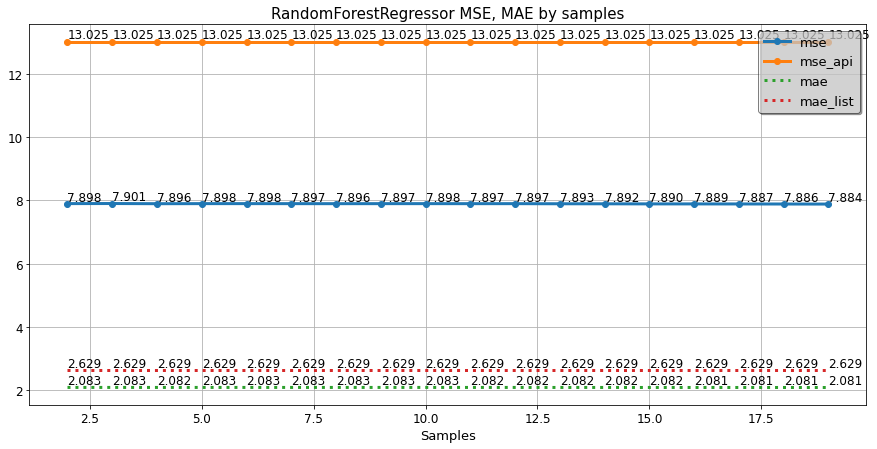

In [169]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(df2['samples'], df2['mse'], 'o-', label='mse', linewidth=3)
plt.plot(df2['samples'], df2['mse_api'], 'o-', label='mse_api', linewidth=3)
plt.plot(df2['samples'], df2['mae'], ':', label='mae', linewidth=3)
plt.plot(df2['samples'], df2['mae_api'], ':', label='mae_list', linewidth=3)

for i in range(df2['samples'].shape[0]):
  num_mse = df2['mse'][i]
  num_mse_api = df2['mse_api'][i]
  num_mae = df2['mae'][i]
  num_mae_api = df2['mae_api'][i]
  plt.text(df2['samples'][i], df2['mse'][i], '{:.3f}'.format(num_mse), verticalalignment='bottom', fontsize=12)
  plt.text(df2['samples'][i], df2['mse_api'][i], '{:.3f}'.format(num_mse_api), verticalalignment='bottom', fontsize=12)
  plt.text(df2['samples'][i], df2['mae'][i], '{:.3f}'.format(num_mae), verticalalignment='bottom', fontsize=12)
  plt.text(df2['samples'][i], df2['mae_api'][i], '{:.3f}'.format(num_mae_api), verticalalignment='bottom', fontsize=12)
  
plt.title('RandomForestRegressor MSE, MAE by samples', fontdict={'size':15})
plt.xlabel('Samples', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(frameon=True, shadow=True, edgecolor='k', framealpha=0.5, fontsize=13);

### lighgbm

In [177]:
from lightgbm import LGBMRegressor

In [193]:
lgb = LGBMRegressor(n_estimators=300, random_state=0)
lgb.fit(x_train, y_train, early_stopping_rounds=100, eval_set=[(x_test, y_test)], eval_metric='mse')

[1]	valid_0's l2: 14.6862	valid_0's l2: 14.6862
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 13.4391	valid_0's l2: 13.4391
[3]	valid_0's l2: 12.4226	valid_0's l2: 12.4226
[4]	valid_0's l2: 11.596	valid_0's l2: 11.596
[5]	valid_0's l2: 10.9114	valid_0's l2: 10.9114
[6]	valid_0's l2: 10.3652	valid_0's l2: 10.3652
[7]	valid_0's l2: 9.90593	valid_0's l2: 9.90593
[8]	valid_0's l2: 9.54766	valid_0's l2: 9.54766
[9]	valid_0's l2: 9.24367	valid_0's l2: 9.24367
[10]	valid_0's l2: 9.01531	valid_0's l2: 9.01531
[11]	valid_0's l2: 8.82105	valid_0's l2: 8.82105
[12]	valid_0's l2: 8.65423	valid_0's l2: 8.65423
[13]	valid_0's l2: 8.50666	valid_0's l2: 8.50666
[14]	valid_0's l2: 8.39173	valid_0's l2: 8.39173
[15]	valid_0's l2: 8.30143	valid_0's l2: 8.30143
[16]	valid_0's l2: 8.21198	valid_0's l2: 8.21198
[17]	valid_0's l2: 8.1436	valid_0's l2: 8.1436
[18]	valid_0's l2: 8.09152	valid_0's l2: 8.09152
[19]	valid_0's l2: 8.03536	valid_0's l2: 8.03536
[20]	valid_0's l2: 

LGBMRegressor(n_estimators=300, random_state=0)

In [194]:
pred = lgb.predict(x_test)
api_eta = x_test[:,0]
mse = mean_squared_error(y_test, pred)
mse_api = mean_squared_error(y_test, api_eta)
mse_list.append(mse)
mse_api_list.append(mse_api)
print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
mae = mean_absolute_error(y_test, pred)
mae_api = mean_absolute_error(y_test, api_eta)
mae_list.append(mae)
mae_api_list.append(mae_api)
print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )
print()

The mean squared error (MSE) on test set: 7.8419
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.0764
The initial error of API ETA on test set: 2.6285



### random forest와 lightgbm 결과 종합

In [197]:
rf = RandomForestRegressor(max_depth=8, random_state=0)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

In [198]:
lgb = LGBMRegressor(n_estimators=300, random_state=0)
lgb.fit(x_train, y_train, early_stopping_rounds=100, eval_set=[(x_test, y_test)], eval_metric='mse')
pred_lgb = lgb.predict(x_test)

[1]	valid_0's l2: 14.6862	valid_0's l2: 14.6862
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 13.4391	valid_0's l2: 13.4391
[3]	valid_0's l2: 12.4226	valid_0's l2: 12.4226
[4]	valid_0's l2: 11.596	valid_0's l2: 11.596
[5]	valid_0's l2: 10.9114	valid_0's l2: 10.9114
[6]	valid_0's l2: 10.3652	valid_0's l2: 10.3652
[7]	valid_0's l2: 9.90593	valid_0's l2: 9.90593
[8]	valid_0's l2: 9.54766	valid_0's l2: 9.54766
[9]	valid_0's l2: 9.24367	valid_0's l2: 9.24367
[10]	valid_0's l2: 9.01531	valid_0's l2: 9.01531
[11]	valid_0's l2: 8.82105	valid_0's l2: 8.82105
[12]	valid_0's l2: 8.65423	valid_0's l2: 8.65423
[13]	valid_0's l2: 8.50666	valid_0's l2: 8.50666
[14]	valid_0's l2: 8.39173	valid_0's l2: 8.39173
[15]	valid_0's l2: 8.30143	valid_0's l2: 8.30143
[16]	valid_0's l2: 8.21198	valid_0's l2: 8.21198
[17]	valid_0's l2: 8.1436	valid_0's l2: 8.1436
[18]	valid_0's l2: 8.09152	valid_0's l2: 8.09152
[19]	valid_0's l2: 8.03536	valid_0's l2: 8.03536
[20]	valid_0's l2: 

In [199]:
pred_rf.shape, pred_lgb.shape

((1916,), (1916,))

In [200]:
pred = (pred_rf + pred_lgb) / 2

In [201]:
pred.shape

(1916,)

In [202]:
api_eta = x_test[:,0]
mse = mean_squared_error(y_test, pred)
mse_api = mean_squared_error(y_test, api_eta)
mse_list.append(mse)
mse_api_list.append(mse_api)
print( "The mean squared error (MSE) on test set: {:.4f}".format(mse) )
print( "The initial error of API ETA on test set: {:.4f}".format(mse_api) )
mae = mean_absolute_error(y_test, pred)
mae_api = mean_absolute_error(y_test, api_eta)
mae_list.append(mae)
mae_api_list.append(mae_api)
print( "The mean absolute error (MAE) on test set: {:.4f}".format(mae) )
print( "The initial error of API ETA on test set: {:.4f}".format(mae_api) )
print()

The mean squared error (MSE) on test set: 7.8429
The initial error of API ETA on test set: 13.0248
The mean absolute error (MAE) on test set: 2.0756
The initial error of API ETA on test set: 2.6285



# 코드 마지막